In [1]:
import sys; sys.path.append('../')

In [2]:
open_ai_api= open("../openai_api_key.key", "r").read()
from agents import Agent, OpenAIChatGPT, set_global_llm, set_live_verbosity

set_live_verbosity(2)
openai_llm = OpenAIChatGPT(
    api_key=open_ai_api,
    model="gpt-4o-mini",
    temperature=0.7,
    top_p=0.9,
    max_tokens=2000
)

set_global_llm(openai_llm)

/Users/voldemort/Desktop/personal_projects/arc-mlu/notebooks/../notebooks/arc_helper.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


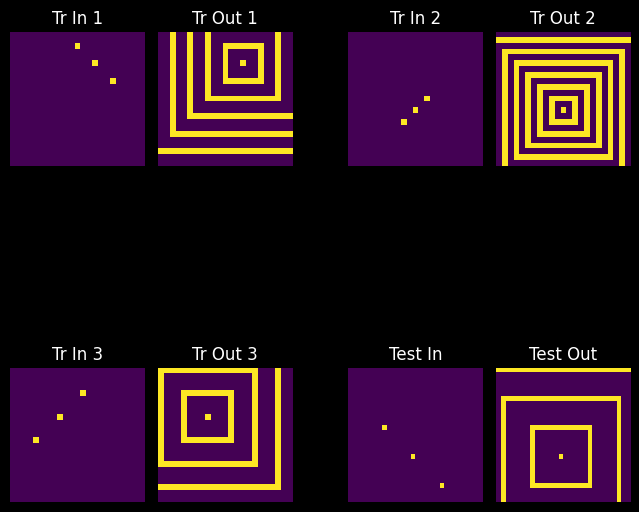

In [3]:
from notebooks.arc_helper import (convert_json_format, generate_string,
                                  plot_sample_matrices)

directory = "./ARC-800-tasks/training"  # Change this to your actual directory path
converted_data = convert_json_format(directory)
data=generate_string(converted_data)
plot_sample_matrices(converted_data[4])

In [4]:
from mlu import MLU

mlu = MLU(main_role="""
                    The goal is to construct the output grid(s) corresponding to the test input grid(s), 
                    using 3 trials for each test input. 'Constructing the output grid' involves picking 
                    the height and width of the output grid, then filling each cell in the grid with a symbol 
                    (integer between 0 and 9, which are visualized as colors). Learn to figure out the 
                    transformation rules and logic of image(matrix) from few given examples and apply it 
                    to the final test image(matrix). Analyze the given examples and predict the final 
                    image(matrix) for the given test image(matrix) and understand how to learn the 
                    transformation rules and logic of image(matrix) from few given examples to apply it 
                    to the final test image(matrix).
                    """,
    collection_name="knowledge_base_v-0.1",
    compress_knowledge=True,
    retrival_limit=15,
)

/opt/homebrew/Caskroom/miniconda/base/envs/voice-clone/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange



Starting Epoch 1



Training:   0%|          | 0/10 [00:00<?, ?it/s]

Response is not parsable
DTW Score: 0.0


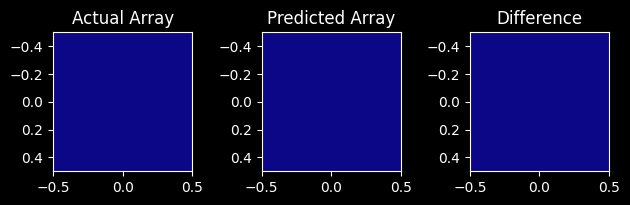

Training:  10%|█         | 1/10 [02:12<19:54, 132.69s/it]Number of requested results 15 is greater than number of elements in index 6, updating n_results = 6
Number of requested results 15 is greater than number of elements in index 6, updating n_results = 6


Pruned 6 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 8b67b27f-9e2c-4254-8cae-b09807ef878f
Delete of nonexisting embedding ID: 03059962-2717-4628-adc0-6d3b50a599e7
Delete of nonexisting embedding ID: 3816b885-43d2-4827-9e4f-a153948de3ee
Delete of nonexisting embedding ID: bcdf653b-98ee-4893-aa91-5a42ccaa0a65
Delete of nonexisting embedding ID: 5a09c60e-cb55-44e0-a446-c33f0766a132
Delete of nonexisting embedding ID: d077caeb-4b25-4789-9de0-ee6e4133fdd2
Delete of nonexisting embedding ID: 8b67b27f-9e2c-4254-8cae-b09807ef878f
Delete of nonexisting embedding ID: 03059962-2717-4628-adc0-6d3b50a599e7
Delete of nonexisting embedding ID: 3816b885-43d2-4827-9e4f-a153948de3ee
Delete of nonexisting embedding ID: bcdf653b-98ee-4893-aa91-5a42ccaa0a65
Delete of nonexisting embedding ID: 5a09c60e-cb55-44e0-a446-c33f0766a132
Delete of nonexisting embedding ID: d077caeb-4b25-4789-9de0-ee6e4133fdd2


Pruned 6 old entries and added 5 new entries.
Response is not parsable
DTW Score: 0.0


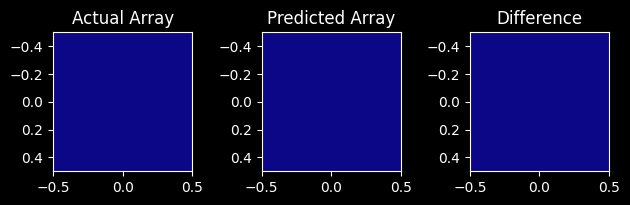

Training:  20%|██        | 2/10 [04:23<17:30, 131.31s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 2b70b1b0-22f9-4072-9794-a0a530eabc3f
Delete of nonexisting embedding ID: 02ca19a1-6bc6-4077-83c3-bfbe5530fbbb
Delete of nonexisting embedding ID: d27ead3f-8f60-455c-8c92-05bd129870c7
Delete of nonexisting embedding ID: 85ad95a3-e07e-42b5-81d1-edbcbef6b92c
Delete of nonexisting embedding ID: 53bed884-dcc0-47e1-8f04-001653b17625
Delete of nonexisting embedding ID: ff2b8d98-160e-4d9f-aa9a-37087db87612
Delete of nonexisting embedding ID: b73b02c9-5cbe-4012-9fba-aae4b5632944
Delete of nonexisting embedding ID: 70a3e764-81af-4719-bf57-787af8af71ae
Delete of nonexisting embedding ID: 28b4a1a9-e897-4e95-8b84-41309fd4ff19
Delete of nonexisting embedding ID: 186653f1-e27f-45ef-9973-278e6b0c0bad
Delete of nonexisting embedding ID: f349c211-bd61-42fe-a079-37f13cc39a7e
Delete of nonexisting embedding ID: 2b3ad71b-b8a2-4474-9139-09a61183f099
Delete of nonexisting embedding ID: 8c8d87d7-d4da-4618-aa70-93eb86b15c01
Delete of nonexisting embedding ID: f739cb2b-4f91-4

Pruned 15 old entries and added 4 new entries.
Response is not parsable
DTW Score: 0.0


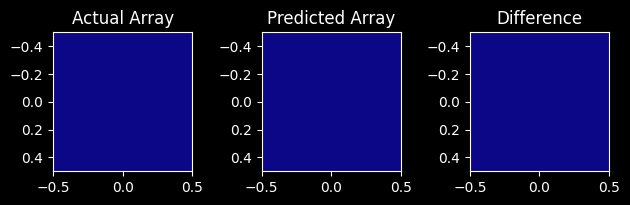

Training:  30%|███       | 3/10 [05:25<11:40, 100.08s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 39680774-68e3-4cdb-9f3b-31d859dc44f0
Delete of nonexisting embedding ID: ba0d2b76-0450-4d7e-b43b-7c5772f84618
Delete of nonexisting embedding ID: c741ad95-1d13-4828-9686-d214f3aa3b0b
Delete of nonexisting embedding ID: 86f9cd24-72af-4908-9c53-ad23355e0670
Delete of nonexisting embedding ID: a3a8c01e-a94f-417c-ba4f-8480ce849876
Delete of nonexisting embedding ID: 4fb03601-fa13-4807-ae7c-bd93ed19b5cb
Delete of nonexisting embedding ID: 0860a8da-ec93-40fb-951d-e020817b8717
Delete of nonexisting embedding ID: ebc3d8bb-48e5-43f4-976f-b903bcd37b30
Delete of nonexisting embedding ID: 3196fac7-51af-4ee9-878f-29deff51b713
Delete of nonexisting embedding ID: 66720332-8e85-4f48-b95c-b9b922a1c8c4
Delete of nonexisting embedding ID: e4b44e94-7169-4903-819d-7db73dedc5ce
Delete of nonexisting embedding ID: 3e5fcff5-791c-4478-a2ac-28e8bbdc23a6
Delete of nonexisting embedding ID: 4c727de9-8044-4a65-93fc-3499c790bb82
Delete of nonexisting embedding ID: 398e6aed-4faa-4

Pruned 15 old entries and added 4 new entries.
DTW Score: 9.539392014169456


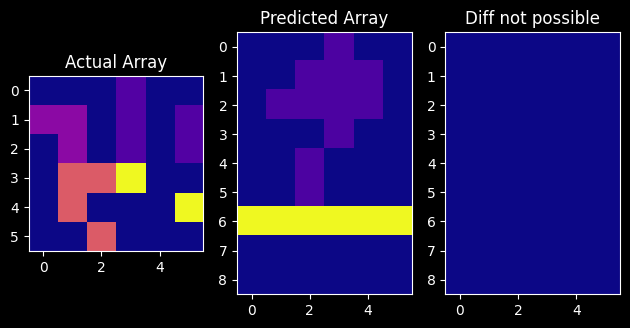

Training:  40%|████      | 4/10 [07:37<11:14, 112.39s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: e396b9d0-af0b-4b12-a612-4e31827a036e
Delete of nonexisting embedding ID: 4c508c23-266e-4ed2-9c88-ad98f9ef5297
Delete of nonexisting embedding ID: 6a00016c-a61e-4d7e-b408-37ded552ff1a
Delete of nonexisting embedding ID: db88596f-dcc0-403d-96a8-693e013c3e16
Delete of nonexisting embedding ID: f19c5793-eec5-45ac-9e22-d6d1aa43a9f9
Delete of nonexisting embedding ID: 74db4d2d-4fd1-4a5d-ab13-bc70925bf459
Delete of nonexisting embedding ID: 9ee3dcab-dc99-483b-9039-3aa7d40cba93
Delete of nonexisting embedding ID: 323ea3eb-afa1-4a42-9c0c-8bf8ee0cb6b0
Delete of nonexisting embedding ID: 71a07aae-5e48-4178-ade1-2abb481d3715
Delete of nonexisting embedding ID: defe688e-6f06-4e6f-ae79-ffebf834a987
Delete of nonexisting embedding ID: f7f33878-f6b1-4b43-ae13-73be1b4427ec
Delete of nonexisting embedding ID: 8918fc56-850d-4aa3-b711-05bbe6b98788
Delete of nonexisting embedding ID: 0ebf18a4-0cde-4709-aab2-24978abc7ee1
Delete of nonexisting embedding ID: db140d41-bcbb-4

Pruned 15 old entries and added 3 new entries.
Response is not parsable
DTW Score: 0.0


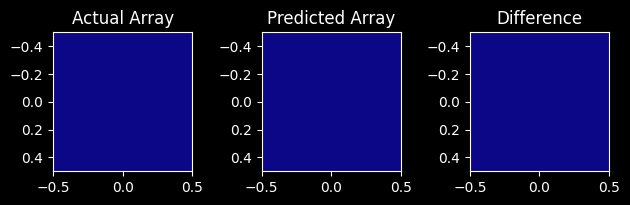

Training:  50%|█████     | 5/10 [08:41<07:55, 95.02s/it] 

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 4ffdb98e-901e-4182-a918-098a5d57bb39
Delete of nonexisting embedding ID: 14a4c941-676d-447d-9ab2-cbffabe04321
Delete of nonexisting embedding ID: fb13e46b-fe92-4600-b96b-8b6d44f7f4a0
Delete of nonexisting embedding ID: c857eb93-7410-42a6-8588-8239bc5e4930
Delete of nonexisting embedding ID: af4834e1-3159-4219-b531-63844389544c
Delete of nonexisting embedding ID: 4a5eb96e-b36d-473c-9dbe-80978cc4f389
Delete of nonexisting embedding ID: a0538ea5-c2a5-46ee-b422-caec288a293d
Delete of nonexisting embedding ID: 157fa96b-27e5-4a27-8c83-475196b66d78
Delete of nonexisting embedding ID: efbcc525-8cf2-4fc6-8805-8611089146d2
Delete of nonexisting embedding ID: ecb3fb0d-a001-4fc2-8a23-77ddcce8afe2
Delete of nonexisting embedding ID: d12c6cd4-5ca7-40e2-8234-0ee4e6cc86d6
Delete of nonexisting embedding ID: d36d6b8b-8884-4813-b4bb-34c0d232338e
Delete of nonexisting embedding ID: a9317730-e98b-4604-9d94-68d010580c72
Delete of nonexisting embedding ID: 8dd2bd8b-d1e0-4

Pruned 15 old entries and added 4 new entries.
DTW Score: 17.776388834631177


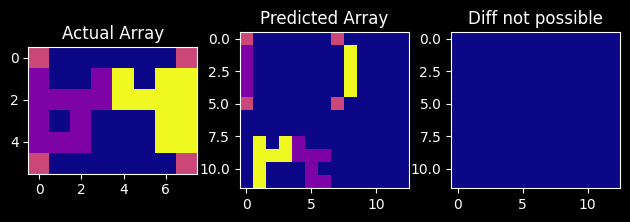

Training:  60%|██████    | 6/10 [11:07<07:28, 112.24s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 2c94258e-221f-436b-ade1-26b08b4e495d
Delete of nonexisting embedding ID: 6302adc3-0b0b-4e1d-8c7a-fe0179707f42
Delete of nonexisting embedding ID: 87c973b4-70fe-45b0-b230-57b4a9374cb8
Delete of nonexisting embedding ID: bcc6b43e-8ae5-4949-8031-babaa2afe935
Delete of nonexisting embedding ID: 5aafc58b-cffd-4cf7-9232-8fb43bcf92e7
Delete of nonexisting embedding ID: dfd71664-2896-47de-b5a7-1121d7255718
Delete of nonexisting embedding ID: 036774ac-354f-49e9-a71a-5bb72b95db41
Delete of nonexisting embedding ID: ebece2be-377a-46a9-9c70-d3273e27b0f9
Delete of nonexisting embedding ID: 97b59970-4139-4fdf-822b-b9cd9ac2a3a2
Delete of nonexisting embedding ID: f4c3e52c-1c55-4185-88c1-0e3bdb5ce380
Delete of nonexisting embedding ID: 0adede8c-3bfe-4fe4-bdd2-311a55492374
Delete of nonexisting embedding ID: 74e0a293-25a7-4988-88d9-4519c48986a5
Delete of nonexisting embedding ID: c0252aec-fe01-4bb7-bcf1-3b31ac7889d0
Delete of nonexisting embedding ID: 621a25c1-d759-4

Pruned 15 old entries and added 4 new entries.
DTW Score: 2.0


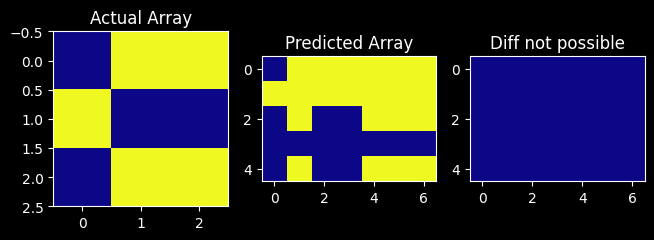

Training:  70%|███████   | 7/10 [12:18<04:56, 99.00s/it] 

Pruned 15 old entries and added 10 new entries.


Delete of nonexisting embedding ID: df7a4fd6-f81c-47ff-b52a-d861e1c6b506
Delete of nonexisting embedding ID: 4a0e4037-1674-48b3-8819-365204705925
Delete of nonexisting embedding ID: d3c6a848-5a23-40f6-90f1-039c72cd9d0a
Delete of nonexisting embedding ID: fa0afd0c-8f8c-4256-9643-a687702c4001
Delete of nonexisting embedding ID: 2544664c-d62e-47af-be3a-fa57fb3c25a9
Delete of nonexisting embedding ID: 65097f09-cf93-4786-a2fd-fc34c09e2ba3
Delete of nonexisting embedding ID: d828849d-13d5-4bb8-a216-aa3b47f29ad2
Delete of nonexisting embedding ID: f5fc870e-0dfc-4880-a1ff-68f291cb279d
Delete of nonexisting embedding ID: a62cc1b4-fa5d-4d5d-8650-c95558674cff
Delete of nonexisting embedding ID: 2dede93a-f9b9-433f-8149-f59765dab5f3
Delete of nonexisting embedding ID: 87c01e35-1fe3-4133-90fa-379abec6cdd6
Delete of nonexisting embedding ID: 10a6d471-89ba-4fd1-b73e-a52554aea29d
Delete of nonexisting embedding ID: 6d636509-5140-4844-95df-0aeae5a2ce9a
Delete of nonexisting embedding ID: 5d0776dd-138c-4

Pruned 15 old entries and added 3 new entries.
DTW Score: 3.0


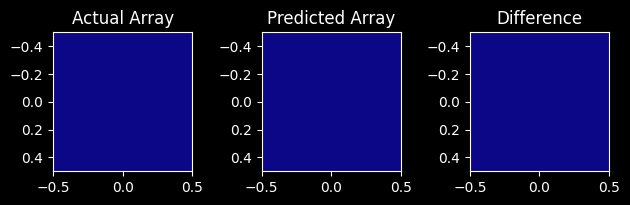

Training:  80%|████████  | 8/10 [13:50<03:13, 96.70s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 4bffc19f-78a8-4198-813e-364e72ba1a92
Delete of nonexisting embedding ID: 953b9be4-8cd5-44bc-9305-6089dc274299
Delete of nonexisting embedding ID: acee4345-f619-4063-b4b1-bd20523e9416
Delete of nonexisting embedding ID: 47356a9b-55b2-4c5f-84ad-19a99d147442
Delete of nonexisting embedding ID: a3a2f164-329c-43f4-b675-5fa1bfda5142
Delete of nonexisting embedding ID: 82d6bcce-1328-43d2-9eb1-fbdff3abb16b
Delete of nonexisting embedding ID: c9e1684a-0866-4e13-956a-687c9132ed27
Delete of nonexisting embedding ID: e890b692-6123-4b34-9db5-5b247cb9a630
Delete of nonexisting embedding ID: 7c6f1b91-31d8-4b79-b656-bda0b14f2dbc
Delete of nonexisting embedding ID: 341121d6-9f0b-485c-a94d-55c25f2e46ac
Delete of nonexisting embedding ID: 0240a675-e853-4397-8abf-571d399a0421
Delete of nonexisting embedding ID: acd5cdcd-6bbd-4eea-b5dc-43dbb3495ae3
Delete of nonexisting embedding ID: 8a0da0ad-facc-472d-9022-266736a24d07
Delete of nonexisting embedding ID: c6127cb6-d05a-4

Pruned 15 old entries and added 4 new entries.
Response is not parsable
DTW Score: 0.0


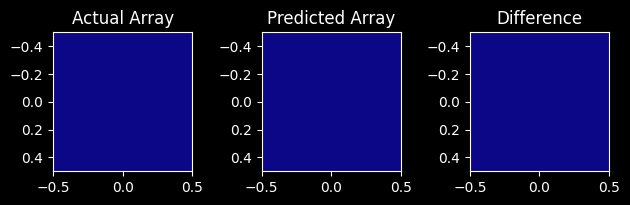

Training:  90%|█████████ | 9/10 [16:19<01:52, 112.94s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 9fed74d1-08f3-4e64-b9e5-cb4d5a4284a9
Delete of nonexisting embedding ID: 6901ccac-86ae-41d5-bc89-8c04dc8694b0
Delete of nonexisting embedding ID: 9e6b7ac5-b3b5-4543-889e-5d2a4d060f6f
Delete of nonexisting embedding ID: 2076f517-c99f-4c4d-a02f-83a625709960
Delete of nonexisting embedding ID: 324a4a96-f1d8-4d2c-a8ab-c4c03fd74e6b
Delete of nonexisting embedding ID: b6fd6945-74b0-46af-8732-717b2d69fc20
Delete of nonexisting embedding ID: 6cfd3166-bdfc-4bc9-bc82-6687b2cf8d76
Delete of nonexisting embedding ID: 3571bd70-f45c-4f62-80c0-4d124715eb9b
Delete of nonexisting embedding ID: b0f763d7-ed6e-4893-8755-ce1f87333276
Delete of nonexisting embedding ID: d32de78e-7ad9-4c0a-b83b-22d85e98dfe5
Delete of nonexisting embedding ID: 5348fbb7-e316-4388-8942-33b9083cac6a
Delete of nonexisting embedding ID: 0ee22f82-a116-4d28-989f-617b637c7c68
Delete of nonexisting embedding ID: 5f12ff56-980d-41b6-97bc-6d312c45f85e
Delete of nonexisting embedding ID: f2ca4a1f-3f51-4

Pruned 15 old entries and added 2 new entries.
Response is not parsable
DTW Score: 0.0


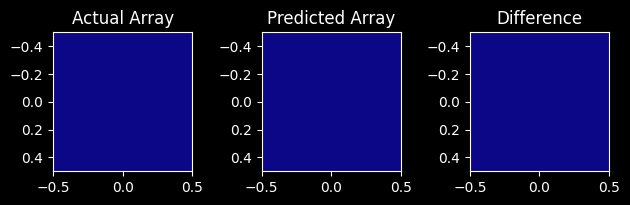

Training: 100%|██████████| 10/10 [17:51<00:00, 107.18s/it]



Epoch 1 Train Accuracy: 0.00% (0/10) 🎓



Testing: 0it [00:00, ?it/s]


Epoch 1 Test Accuracy: 0.00% (0/0) 🧪



In [5]:
from train_test_helper import train_and_evaluate

from logical_agents import logic_concept_reasoning_network

reasoning_iterations=4
reasoning_agent=lambda prompt,input: logic_concept_reasoning_network(f"{prompt}\n{input}", max_iterations=reasoning_iterations)

set_live_verbosity(0)

n = 10 # 10 
import random

selected_data = random.sample(data, n)

results, train_dtw_scores, test_dtw_scores=train_and_evaluate(
    dataset=selected_data,  
    mlu=mlu,
    prompt_key="query",
    response_key="reply",
    epochs=1,
    test_size=0,
    train_batch_size=1,
    test_batch_size=1,
    initial_serial_items=1,
    logging=True,
    training_analysis_agent = reasoning_agent,
    testing_analysis_agent = reasoning_agent,
)

In [6]:
print(train_dtw_scores, test_dtw_scores)

[0.0, [0.0], [0.0], [9.539392014169456], [0.0], [17.776388834631177], [2.0], [3.0], [0.0], [0.0]] []
